Bragg angle & intensity calculator
Description: The purpose of this code is to...

i) read in atomic form factors 

ii) read in user-inputted atomic positions

iii) Calculate the structure factor

iv) Calculate bragg angles and respective miller indices & intensities

v) Plot and export relevant information

David Beckwitt
August 8/3/2022

# Initialize parameters

In [322]:
%reset

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# rounding function (dfault: n=3 decimals)
rd = lambda x, n=3: np.round(x,n)
π= np.pi

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [323]:
# X-Ray Wavelength (Cu-K-α)
λ= 1.54178*10**-10

# Initialize Geometry of Molecule

Molecule name:$\text{PbI}_2$

Space Group: $\text{Hexagonal } \text{P6}_3\text{mc}$

In [324]:
# unit cell vectors 
av= 4.558*10**-10
bv= av 
cv= 2*6.986*10**-10

In [325]:
#unit cell angles 
α=π/2
β=π/2
γ=3*π/2

## Atomic Form Factors

Form Factor Eq:
\begin{equation}\label{eq:}
f= \sum_{\ell=1}^4 a_\ell \cdot e^{-b_\ell \big( \frac{q}{4 \pi} \big)^2} + c
\end{equation}


In [326]:
a = [0]*4
b = [0]*4
q, x = sp.symbols('q x')

# Atomic Form Factor Class
class AFF:
    def __init__(self, a, b,c):
        self.a = np.array(a)
        self.b = np.array(b)
        self.c = np.array(c)


# Solve equation for referenced atom
def evalF(mol,q):
        x = float(0)
        for i in range(4): 
             x += mol.a[i] * sp.exp(-mol.b[i] * (q/(4*π))**2)
        return x + mol.c

12.4734 + 7.01107*exp(-0.150798850644482*q**2) + 19.1406*exp(-0.0428886237784038*q**2) + 21.7886*exp(-0.00846411837852179*q**2) + 19.5682*exp(-0.00309272147692474*q**2)


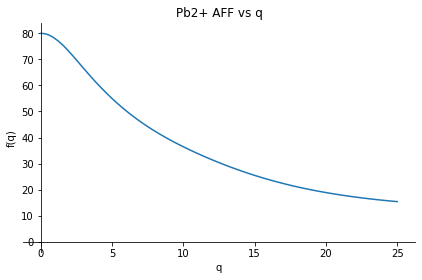

In [327]:
# Lead 2+
a[0] = 21.7886
a[1] = 19.5682
a[2] = 19.1406
a[3] = 7.01107

b[0] = 1.3366
b[1] = 0.488383
b[2] = 6.7727
b[3] = 23.8132


c = 12.4734

Pb= AFF(a,b,c)

Pbsol = evalF(Pb,q)
print(Pbsol)

# Plot with sympy. plot2 is an invisible point at the origin to keep the plot correct.
PbPlot = sp.plotting.plot(Pbsol, (q,0,25),nb_of_points=1000, show=False, title= ("Pb2+ AFF vs q"))
plot2 = sp.plotting.plot(0,(x,0,1/1000), line_color='none', show=False)

PbPlot.append(plot2[0])
PbPlot.show()

4.0714 + 2.8868*exp(-0.537828040951075*q**2) + 7.8069*exp(-0.186974946006581*q**2) + 20.2332*exp(-0.027596724137184*q**2) + 18.997*exp(-0.00241587697247199*q**2)


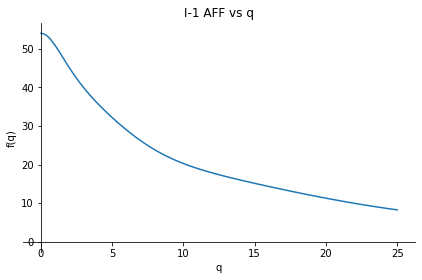

In [328]:
#Iodine -1
a[0] = 20.2332;
a[1] = 18.997;
a[2] = 7.8069;
a[3] = 2.8868;

b[0] = 4.3579;
b[1] = 0.3815;
b[2] = 29.5259;
b[3] = 84.9304;


c = 4.0714;

I=AFF(a,b,c)

Isol = evalF(I,q)
print(Isol)

IPlot = sp.plotting.plot(Isol, (q,0,25),nb_of_points=1000,show=False, title= ("I-1 AFF vs q"))

IPlot.append(plot2[0])
IPlot.show()

## Reciprocal Vectors

Hexagonal structure has reciprocal vectors of
\begin{equation}
q = \sqrt{\frac{4}{3} \frac{h^2 + h k+ k^2}{\alpha^2} + \frac{\ell^2}{\beta^2}}
\end{equation}



In [332]:
# For hexagonal
h, k, ℓ = sp.symbols('h k ℓ')

def RecVec(h, k, ℓ,α,β):
    return sp.sqrt(4/3 * (h**2 + h*k + k**2)/α**2+ (ℓ/β)**2)

Tomorrow I'll look to solve theta as a function of q in ascending miller index sums